Fully connected (Multi Layer Perceptron)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def get_labels(proba):
    return (proba >= 0.5) * 1

In [ ]:
class NeuralNetwork:

    def __init__(self, layers_size):
        # +1 -> add bias unit
        self.w0 = np.random.rand(layers_size[0] + 1 , layers_size[1])
        self.w1 = np.random.rand(layers_size[1] + 1 , layers_size[2])
        
    def forward_propogation(self, features):
        m, n = features.shape

        self.a0 = features
        self.a0 = np.hstack((np.ones((m, 1)), self.a0))

        self.a1 = sigmoid(self.a0 @ self.w0)
        self.a1 = np.hstack((np.ones((m, 1)), self.a1))

        self.a2 = sigmoid(self.a1 @ self.w1)
        self.hyp = self.a2

        # print('input')
        # print(self.a0.shape,
        #       self.a1.shape,
        #       self.a2.shape)

    def loss_function(self, labels):
        self.loss2 = labels - self.a2
        self.final_loss = self.loss2

    def back_propogation(self):
        loss1 = (self.loss2 @ self.w1.T) * sigmoid_derivative(self.a1)

        loss1 = loss1[:,  1:] # remove bias

        print('bp')
        print(self.w1.shape,
              self.a1.T.shape,
              self.loss2.shape)
        
        self.w1 += self.a1.T @ self.loss2
 
        self.w0 += self.a0.T @ loss1

        # useless loss0
        loss0 = (self.w0 @ loss1.T).T * sigmoid_derivative(self.a0)
        loss0 = loss0[:, 1:]

    def fit(self, features, labels):
        
        cnt_it = 1000 # 1000
        self.story = np.ndarray(shape = (cnt_it))
        for it in range(cnt_it):
            self.forward_propogation(features)  
            self.loss_function(labels)
            
            self.story[it] = self.cost_function(labels)

            self.back_propogation()

    def predict_proba(self, features):
        self.forward_propogation(features)
        return self.a2

    def cost_function(self, labels):
        eps = 10**(-50)
        m = labels.shape[0]

        cost = - labels * np.log(self.hyp + eps) - (1 - labels) * np.log(1 - self.hyp + eps)
        average_cost = np.sum(cost, axis = None) / m

        return average_cost

    def get_weights(self):
        return [self.w0, self.w1]

    def get_story(self):
        return self.story

In [ ]:
layers_size = np.array([2, 5, 3])

features_train = np.array([ [0, 0], [0, 1], [1, 0], [1, 1]])
labels_train = np.array([ [0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0]])

print(features_train.shape)

features_test = np.array([ [0, 0], [0, 1], [1, 0], [1, 1]])
labels_test = labels_train

nn = NeuralNetwork(layers_size)
nn.fit(features_train, labels_train)

proba_predict = nn.predict_proba(features_test)
labels_predict = get_labels(proba_predict)

print(proba_predict)
print(labels_predict)
print(labels_test)


w0, w1 = nn.get_weights()
print(w0)
print(w1)

(4, 2)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3) (6, 4) (4, 3)
bp
(6, 3)

(1000,)


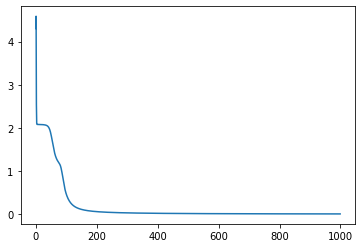

In [ ]:
story = nn.get_story()
print(story.shape)
x = np.arange(story.shape[0])
plt.plot(x, story)
plt.show()